### Context

- Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.



### How can you help here?

- Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

### Column Profiling:

- Serial No. (Unique row ID)
- GRE Scores (out of 340)
- TOEFL Scores (out of 120)
- University Rating (out of 5)
- Statement of Purpose and Letter of Recommendation Strength (out of 5)
- Undergraduate GPA (out of 10)
- Research Experience (either 0 or 1)
- Chance of Admit (ranging from 0 to 1)

### Concept Used:

- Exploratory Data Analysis
- Linear Regression

### What does good looks like?

- Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset.
- Drop the unique row Identifier if you see any. This step is important as you don’t want your model to build some understanding based on row numbers.
- Use Non-graphical and graphical analysis for getting inferences about variables.
-  This can be done by checking the distribution of variables of graduate applicants.
- Once you’ve ensured that students with varied merit apply for the university, you can start understanding the relationship between different factors responsible for graduate admissions.
-  Check correlation among independent variables and how they interact with each other.
- Use Linear Regression from (Statsmodel library) and explain the results.
-  Test the assumptions of linear regression:
-  Multicollinearity check by VIF score
-  Mean of residuals
-  Linearity of variables (no pattern in residual plot)
-  Test for Homoscedasticity
-  Normality of residuals
- Do model evaluation- MAE, RMSE, R2 score, Adjusted R2.
- Provide actionable Insights & Recommendations
- Try out different Linear Regressions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
df = pd.read_csv('Jamboree_Admission.csv')
df.head(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76


In [3]:
df1 = df.copy()
df1.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Identification of variables and data types:

### Number of rows and columns

In [4]:
df1.shape

(500, 9)

### Data information 
- Number of rows = 500 
- Number of columns = 9
- Any missing values? - No
- Data type - Integer (5 features) and float (4 features)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


## Analysing the basic metrics:

In [6]:
df1.describe(include = 'all')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
df1['Research'].value_counts()

1    280
0    220
Name: Research, dtype: int64

## Data Preprocessing

### Dropping duplicates
- Any duplicate row found ? - No

In [8]:
df1.drop_duplicates()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


#### Dropping Seriol No. colums

In [9]:
df1.drop(labels = 'Serial No.', axis = 1, inplace = True)

In [10]:
df1.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76


## Visual Analysis:

#### Histogram/Kdeplot
- Distribution of the data — Whether the data is normally distributed or if it’s skewed (to the left or right)


<AxesSubplot:xlabel='GRE Score', ylabel='Count'>

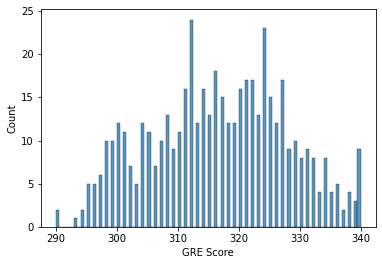

In [11]:
sns.histplot(data = df1['GRE Score'], bins = 100)

<AxesSubplot:xlabel='TOEFL Score', ylabel='Count'>

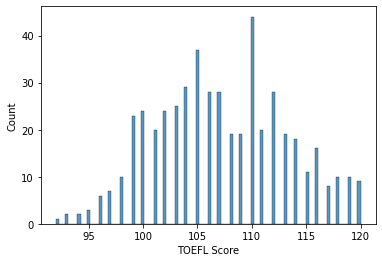

In [12]:
sns.histplot(data = df1['TOEFL Score'], bins = 100)

<AxesSubplot:xlabel='CGPA', ylabel='Count'>

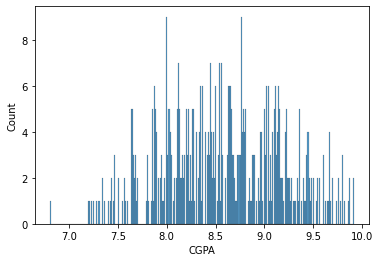

In [13]:
sns.histplot(data = df1['CGPA'], bins = 300)

C:\Users\Friends\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GRE Score', ylabel='Density'>

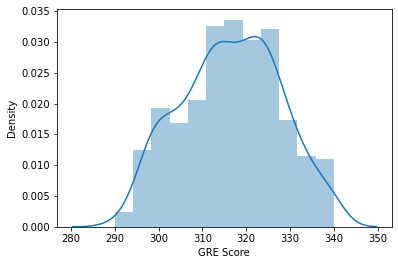

In [14]:
sns.distplot(a = df1['GRE Score'])

<AxesSubplot:xlabel='GRE Score', ylabel='Density'>

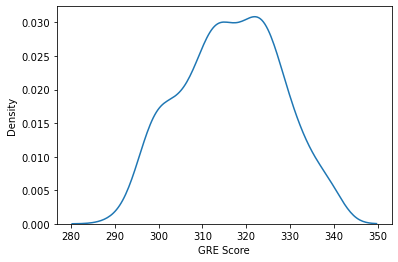

In [15]:
sns.kdeplot(x= df1['GRE Score'])

#### Box Plot
-visual representation of the statistical summary of a given data set. The Summary includes

<AxesSubplot:>

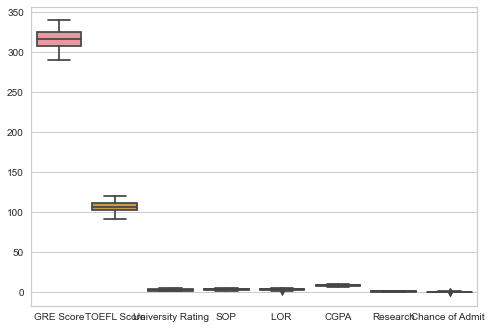

In [56]:
sns.boxplot(data = df1)

### Observation 
- there is no outliers in the data 

### Bivariate Analysis:

In [17]:
# Correlation

df1.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<AxesSubplot:>

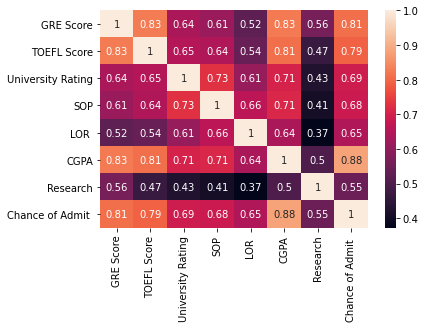

In [18]:
sns.heatmap(df1.corr(), annot = True)

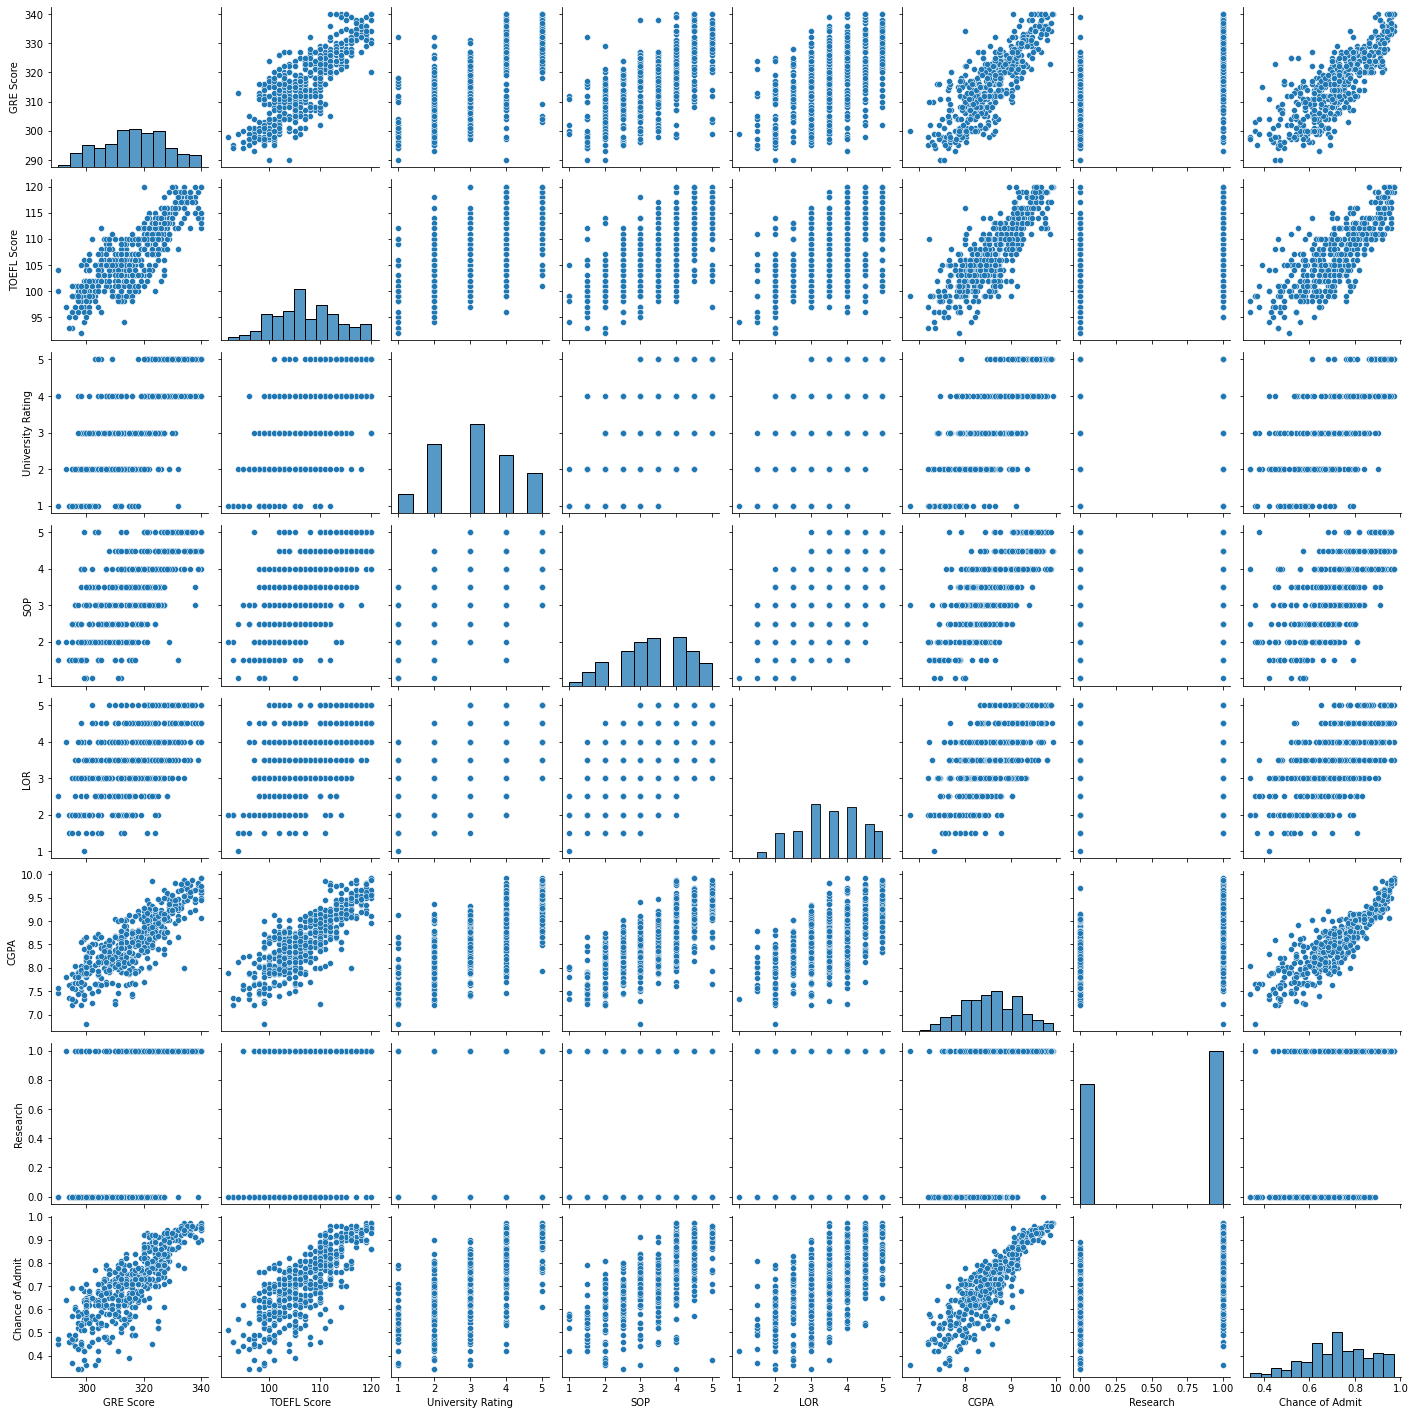

In [19]:
sns.pairplot(data = df1)

### Variable transformations: 
- Feature Transformation and Scaling Techniques to Boost Your Model Performance

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [21]:
scaler.fit(df1)

MinMaxScaler()

In [22]:
X = scaler.transform(X = df1)
new_X = pd.DataFrame(X, columns = df1.columns)
new_X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.730159
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063


#### checking correlation of transformed data

<AxesSubplot:>

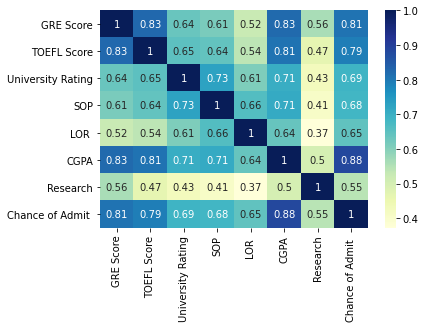

In [23]:
sns.heatmap(new_X.corr(),cmap="YlGnBu", annot=True)

### From above correlation we can conclude that - GRE score, TOEFL Score, University rating, SOP, LOR, CGPA are highly correlated

## Model training - using linear regression

In [24]:
# dropping target variable from dataframe
new_X.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [25]:
# data needs to train the model
X = new_X.drop(['Chance of Admit '], axis = 1)
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0
...,...,...,...,...,...,...,...
495,0.84,0.571429,1.00,0.875,0.750,0.711538,1.0
496,0.94,0.892857,1.00,1.000,1.000,0.983974,1.0
497,0.80,1.000000,1.00,0.875,1.000,0.884615,1.0
498,0.44,0.392857,0.75,0.750,1.000,0.522436,0.0


In [26]:
X.shape

(500, 7)

In [27]:
new_X.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [28]:
# target variable
Y = new_X['Chance of Admit ']
#Y = Y.reshape(-1,1)
Y.shape

(500,)

## Using Sklearn

In [29]:
reg = LinearRegression().fit(X, Y)

### R Square value

In [30]:
reg.score(X, Y)

0.8219007395178417

## Using statsModel

In [31]:
import statsmodels.api as sm
X = sm.add_constant(X)

In [32]:
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Fri, 19 Aug 2022   Prob (F-statistic):          8.21e-180
Time:                        14:23:35   Log-Likelihood:                 470.37
No. Observations:                 500   AIC:                            -924.7
Df Residuals:                     492   BIC:                            -891.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0130      0.01

### Observation
- R-squared:                       0.822
- Adj. R-squared:                  0.819
- Both the values are nearby, so our model is predicting in right direction

## Model performance evaluation

In [52]:
# checking on High values
new_value = [0.94      , 0.92857143, 0.95      , 0.95     ,
       0.95    , 0.91346154, 1.        ]

In [53]:
reg.predict(np.array([new_value]))

C:\Users\Friends\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.98757076])

In [54]:
# checking on low values
new_value1 = [0.20      , 0.20, 0.29      , 0.35    ,
       0.40   , 0.30, 0    ]

In [55]:
reg.predict(np.array([new_value1]))

C:\Users\Friends\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.30040723])

### VIF 
- Checking for non-multicollinearity

In [42]:
def vif(R):
    VIF = 1/(1-R**2)
    return VIF
vif(0.822)

3.0834124742535054

### Observation 

- VIF score = 3.0
- There is a chance of multicollinearity, but not severe enough.
- Hence we can't drop any features

## Goldfeld-Quandt homoskedasticity test.

In [43]:
import statsmodels
statsmodels.stats.diagnostic.het_goldfeldquandt(Y, X, idx=None, split=None, drop=None, alternative='increasing', store=False)

(0.44940443304624367, 0.9999999995739839, 'increasing')

## Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line) 

In [48]:
#pip install yellowbrick

In [49]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

from yellowbrick.regressor import ResidualsPlot

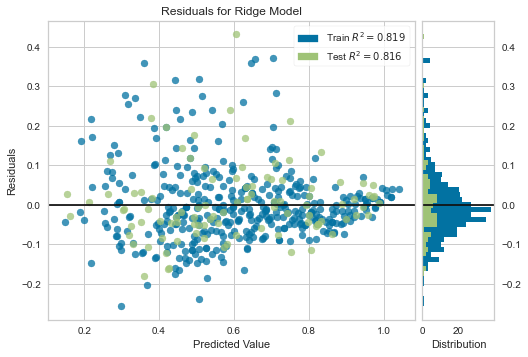

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [50]:
# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

C:\Users\Friends\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


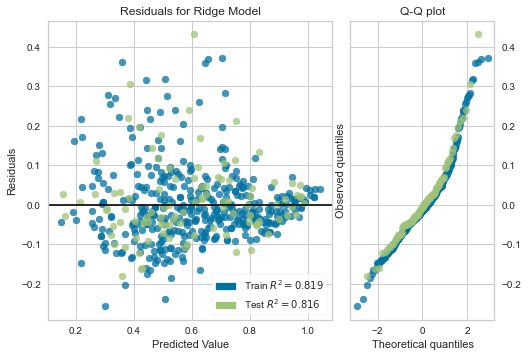

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [51]:
visualizer = ResidualsPlot(model, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()